In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv("~/Documents/ML/dataset/customers.csv")

In [3]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
data.duplicated().sum()

0

<Axes: xlabel='custcat', ylabel='Count'>

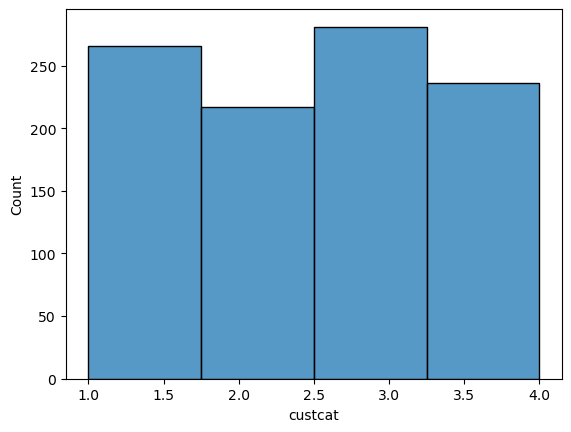

In [7]:
sns.histplot(data.custcat, bins=data["custcat"].nunique())

In [8]:
X = data.drop("custcat", axis=1)
y = data.custcat

In [9]:
from IPython.display import display

def rates(X):
    data = pd.concat([X, y], axis=1)
    global_mean = round(y.mean(), 3)
    for col in [col for col in X.columns if X[col].nunique() <= 10]:
        df = data.groupby(by=col).custcat.agg(["mean"])
        df["diff"] = df["mean"] - global_mean
        df["rate"] = df["mean"] / global_mean
        display(df)

In [10]:
rates(X)

,mean,diff,rate
region,,,
1,2.521739,0.034739,1.013968
2,2.485030,-0.001970,0.999208
3,2.456395,-0.030605,0.987694


,mean,diff,rate
marital,,,
0,2.394059,-0.092941,0.962629
1,2.581818,0.094818,1.038126


,mean,diff,rate
ed,,,
1,2.166667,-0.320333,0.871197
2,2.414634,-0.072366,0.970902
3,2.473684,-0.013316,0.994646
4,2.760684,0.273684,1.110046
5,2.863636,0.376636,1.151442


,mean,diff,rate
retire,,,
0.0,2.484785,-0.002215,0.999109
1.0,2.531915,0.044915,1.018060


,mean,diff,rate
gender,,,
0,2.492754,0.005754,1.002313
1,2.481625,-0.005375,0.997839


,mean,diff,rate
reside,,,
1,2.344000,-0.143000,0.942501
2,2.573529,0.086529,1.034793
3,2.601449,0.114449,1.046019
4,2.475000,-0.012000,0.995175
5,2.516667,0.029667,1.011929
6,2.896552,0.409552,1.164677
7,2.500000,0.013000,1.005227
8,3.500000,1.013000,1.407318


In [11]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [12]:
def correlation(X):
    corr = X.corrwith(y).sort_values(ascending=False).to_frame(name="Correlation")
    return corr

<Axes: >

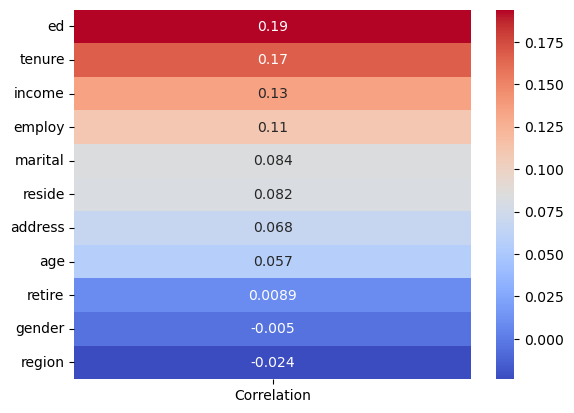

In [13]:
sns.heatmap(correlation(X), annot=True, cmap="coolwarm")

In [14]:
X = X.drop(["retire", "gender"], axis=1)

In [15]:
from sklearn.model_selection import train_test_split

x_trainval, x_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=12)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
from sklearn.model_selection import GridSearchCV

params = {"n_neighbors":[1,2,3,5,10,25,50,100,200,300],"weights":["uniform","distance"],"algorithm":["ball_tree","kd_tree"],"metric":["euclidean","manhattan"]}

grid_search = GridSearchCV(model, params, cv=5, scoring="accuracy")
grid_search.fit(x_val, y_val)

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packa

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packa

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packa

/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aja/anaconda3/lib/python3.11/site-packa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 5, 10, 25, 50, 100, 200, 300],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [18]:
best_params = grid_search.best_params_
best_params

{'algorithm': 'ball_tree',
 'metric': 'manhattan',
 'n_neighbors': 50,
 'weights': 'uniform'}

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score

model.set_params(algorithm=best_params["algorithm"],metric=best_params["metric"],n_neighbors=best_params["n_neighbors"], weights=best_params["weights"])

prediction = model.predict(x_test)

# evaluation
print("Accuracy: ", accuracy_score(y_test, prediction))

Accuracy:  0.335
